In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv")

In [3]:
# filas antes de eliminar los valores nulos
filas_inicio= df.shape[0]
#Eliminar las filas con valores nulos en la columna 'Price'
df_limpio = df.dropna(subset=['Price'])
filas_despues = df_limpio.shape[0]
#Convierte price a entero
df_limpio.loc[:, 'Price'] = df_limpio['Price'].astype(int)
print(f"El % eliminado de datos es {1-(filas_despues/filas_inicio)}")


El % eliminado de datos es 0.21832056688756918


In [4]:
df_limpio["Type"].value_counts()

Type
h    18472
u     5909
t     2866
Name: count, dtype: int64

In [5]:
#The most comon type of property
h_total = (df_limpio["Type"] == "h").sum()
u_total=(df_limpio["Type"] == "u").sum()
t_total=(df_limpio["Type"] == "t").sum()
most_common=h_total/(h_total+u_total+t_total)
most_common

0.6779461959114765

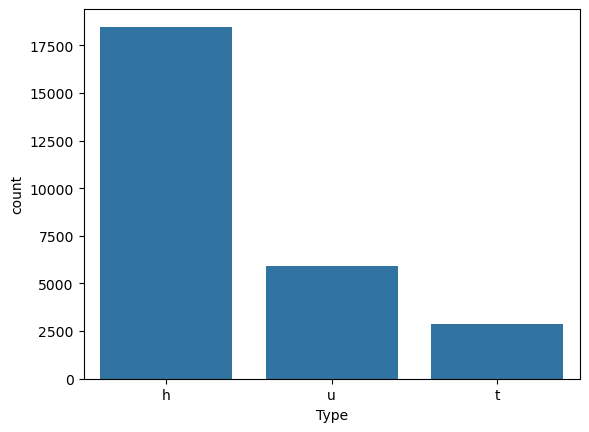

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las categorías de 'Type' ordenadas por frecuencia de mayor a menor
order = df_limpio['Type'].value_counts().index

# Crear el countplot con las barras ordenadas de mayor a menor
sns.countplot(x="Type", data=df_limpio, order=order)
plt.show()

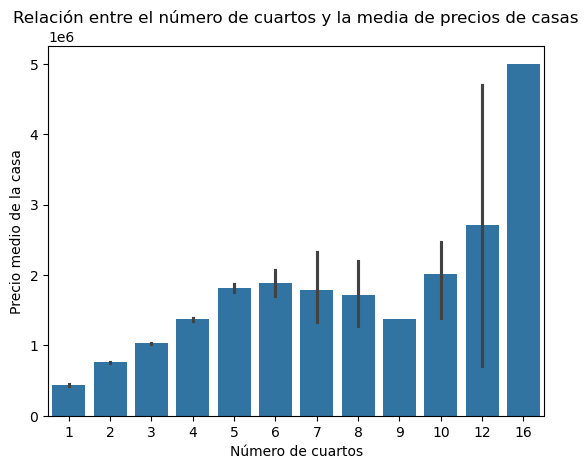

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la media de los precios de casas para cada número de cuartos
sns.barplot(x="Rooms", y="Price", data=df_limpio, estimator="mean")

# Mostrar el gráfico
plt.title("Relación entre el número de cuartos y la media de precios de casas")
plt.xlabel("Número de cuartos")
plt.ylabel("Precio medio de la casa")
plt.show()

In [19]:
# Calcular el coeficiente de correlación de Spearman entre 'Rooms' y 'Price'
from scipy.stats import spearmanr
corr, p_value = spearmanr(df_limpio['Rooms'], df_limpio['Price'])
print(f"coeficiente={corr}")

coeficiente=0.5042971590926004


coeficiente=-0.18809341092744206


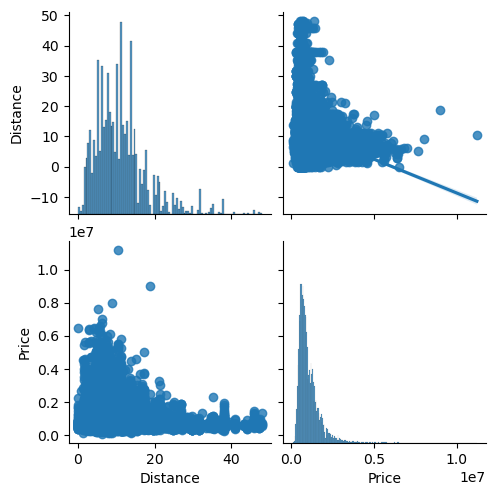

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

#Se procede a eliminar los valores nulos en la columna Distance, para calcular correlación
df_limpio1 = df_limpio.dropna(subset=['Distance', 'Price']) 

# Calcular el coeficiente de correlación de Spearman entre 'Distance' y 'Price'
corr, p_value = spearmanr(df_limpio1['Distance'], df_limpio1['Price'])
print(f"coeficiente={corr}")

# Crear el pairplot entre 'Num_rooms' y 'Price'
sns.pairplot(df_limpio1[['Distance', 'Price']],kind='reg')

# Mostrar el gráfico
plt.show()

Coeficiente : 0.27649184258236104


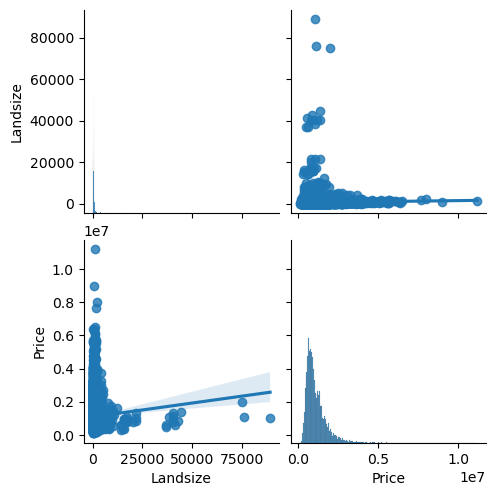

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Se procede a eliminar los valores nulos en las columnas 'Landsize' y 'Price'
df_limpio1 = df_limpio.dropna(subset=['Landsize', 'Price']) 

# Filtramos outliers en 'Landsize', tomando valores hasta 100,000 m2
#landsize_filt = df_limpio1[df_limpio1['Landsize'] < 100000]

# Calcular el coeficiente de correlación de Spearman entre 'Landsize' y 'Price'
corr, p_value = spearmanr(landsize_filt['Landsize'], landsize_filt['Price'])
print(f"Coeficiente : {corr}")

# Crear el pairplot entre 'Landsize' y 'Price'
sns.pairplot(landsize_filt[['Landsize', 'Price']], kind='reg')

# Mostrar el gráfico
plt.show()


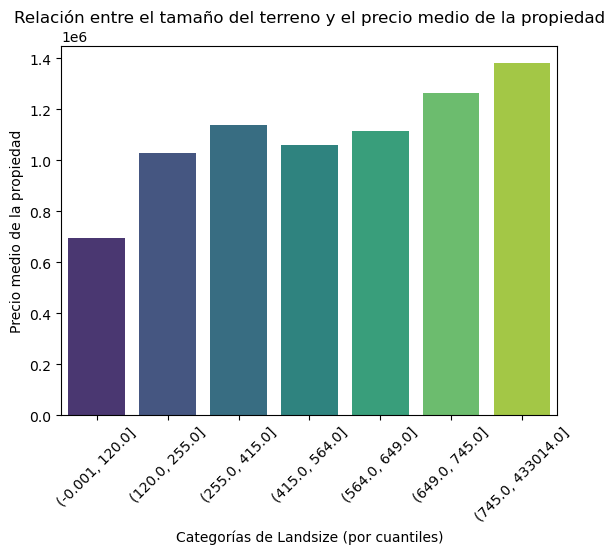

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Eliminar los valores nulos en las columnas 'Landsize' y 'Price'
df_limpio1 = df_limpio.dropna(subset=['Landsize', 'Price']).copy()  # Se asegura de trabajar con una copia

# Discretizar 'Landsize' en 7 cuantiles
df_limpio1.loc[:, 'Landsize_quantiles'] = pd.qcut(df_limpio1['Landsize'], q=7)

# Calcular la mediana de 'Price' para cada categoría de 'Landsize_quantiles'
media_price = df_limpio1.groupby('Landsize_quantiles', observed=True)['Price'].mean().reset_index()

# Crear un gráfico de barras para visualizar la mediana de 'Price' en cada cuantile de 'Landsize'
sns.barplot(data=media_price, x='Landsize_quantiles', y='Price', hue='Landsize_quantiles', palette='viridis', legend=False)

# Personalizar el gráfico
plt.title('Relación entre el tamaño del terreno y el precio medio de la propiedad')
plt.xlabel('Categorías de Landsize (por cuantiles)')
plt.ylabel('Precio medio de la propiedad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la legibilidad

# Mostrar el gráfico
plt.show()


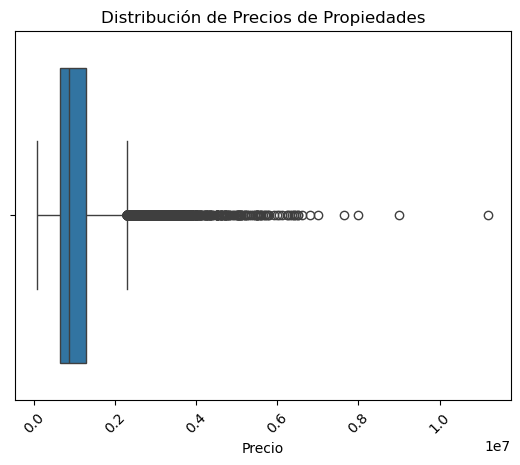

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para la columna 'Price' del DataFrame 'df_limpio'
sns.boxplot(data=df_limpio, x='Price')

# Personalizar el gráfico
plt.title('Distribución de Precios de Propiedades')
plt.xlabel('Precio')
plt.xticks(rotation=45)  # Si las etiquetas de eje x son muy largas, puedes rotarlas

# Mostrar el gráfico
plt.show()

In [61]:
import pandas as pd

# Calcular el rango imtercuartil para la columna 'Price'
Q1 = df_limpio['Price'].quantile(0.25)
Q3 = df_limpio['Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar los outliers
df_limpio_sin_outliers = df_limpio[(df_limpio['Price'] >= limite_inferior) & (df_limpio['Price'] <= limite_superior)]

# Mostrar el porcentaje de datos eliminados
print(f"% de datos eliminados: {1-(len(df_limpio_sin_outliers)/len(df_limpio))}")


% de datos eliminados: 0.04690424633904655


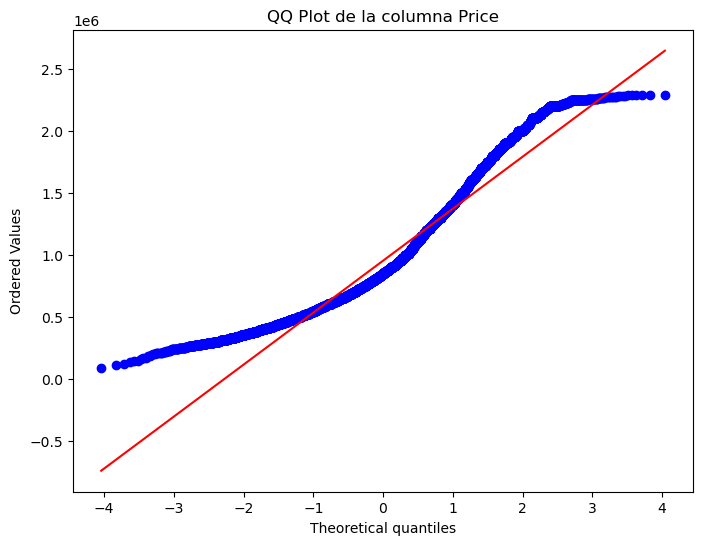

Curtosis de Price: 0.1277510982528578
Skewness de Price: 0.8606527837520663


In [62]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Crear el QQ plot para la columna 'Price' del DataFrame 'df_limpio_sin_outliers'
plt.figure(figsize=(8, 6))
stats.probplot(df_limpio_sin_outliers['Price'], dist="norm", plot=plt)
plt.title('QQ Plot de la columna Price')
plt.show()

# Calcular la curtosis y la skewness de la columna 'Price'
curtosis_value = kurtosis(df_limpio_sin_outliers['Price'])
skewness_value = skew(df_limpio_sin_outliers['Price'])

# Mostrar los resultados de curtosis y skewness
print(f"Curtosis de Price: {curtosis_value}")
print(f"Skewness de Price: {skewness_value}")


In [63]:
import scipy.stats as stats

# Aplicar el test de Kolmogorov-Smirnov para la columna 'Price' con la distribución normal
statistic, p_value = stats.kstest(df_limpio_sin_outliers['Price'], 'norm', 
                                   args=(df_limpio_sin_outliers['Price'].mean(), df_limpio_sin_outliers['Price'].std()))

# Imprimir el valor estadístico y el valor p
print(f"Estadístico KS: {statistic}")
print(f"Valor p: {p_value}")

# Interpretación del valor p
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: los datos no siguen una distribución normal.")
else:
    print("No rechazamos la hipótesis nula: los datos podrían seguir una distribución normal.")


Estadístico KS: 0.10258783372478225
Valor p: 2.11632760869467e-238
Rechazamos la hipótesis nula: los datos no siguen una distribución normal.


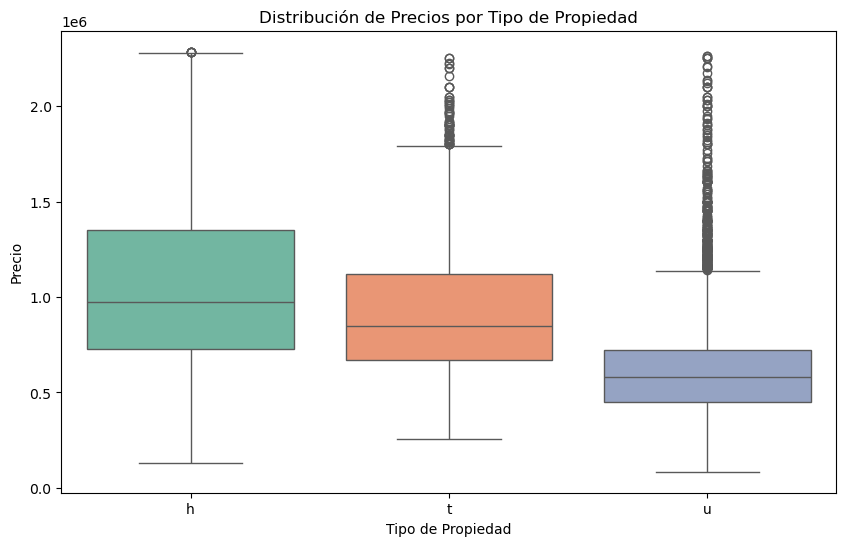

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot de la columna 'Price' categorizado por la columna 'Type' (con valores 'h', 'u', 't')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_limpio_sin_outliers, hue='Type', palette="Set2", dodge=False)

# Título y etiquetas
plt.title('Distribución de Precios por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()



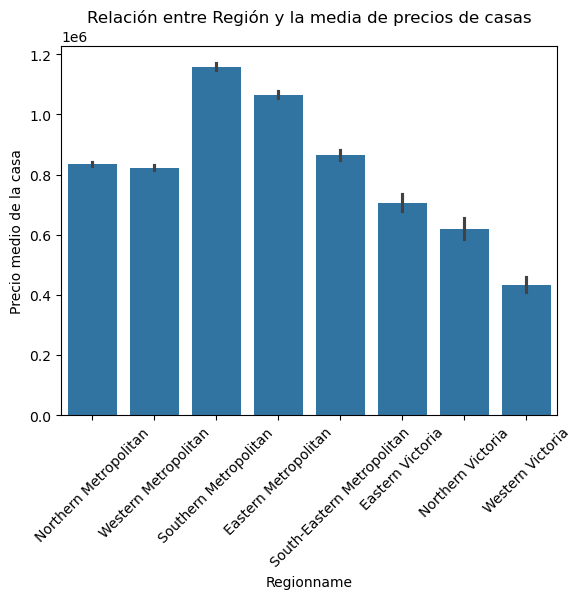

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la media de los precios de casas para cada región
sns.barplot(x="Regionname", y="Price", data=df_limpio_sin_outliers, estimator="mean")

# Mostrar el gráfico
plt.title("Relación entre Región y la media de precios de casas")
plt.xlabel("Regionname")
plt.ylabel("Precio medio de la casa")

# Rotar las etiquetas del eje X en 45 grados para mejorar la visibilidad
plt.xticks(rotation=45)

plt.show()


In [78]:
df_limpio_sin_outliers['Date']

1         3/12/2016
2         4/02/2016
4         4/03/2017
5         4/03/2017
6         4/06/2016
            ...    
34852    24/02/2018
34853    24/02/2018
34854    24/02/2018
34855    24/02/2018
34856    24/02/2018
Name: Date, Length: 25969, dtype: object

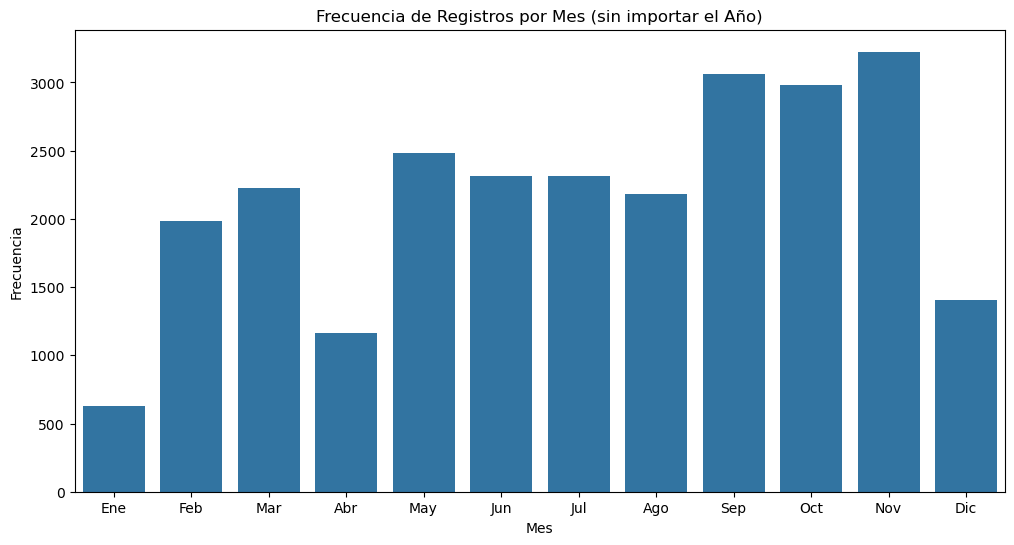

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'Date' esté en el formato de fecha correcto
df_limpio_sin_outliers.loc[:, 'Date'] = pd.to_datetime(df_limpio_sin_outliers['Date'], format='%d/%m/%Y')

# Extraer el mes de la columna 'Date' (sin considerar el año)
df_limpio_sin_outliers.loc[:, 'Month'] = df_limpio_sin_outliers['Date'].dt.month

# Contar la frecuencia de registros por mes
monthly_counts = df_limpio_sin_outliers['Month'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)

# Configurar el título y las etiquetas
plt.title('Frecuencia de Registros por Mes (sin importar el Año)')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(12), labels=["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

# Mostrar la gráfica
plt.show()



In [110]:
import pandas as pd

# Extraer el año de la columna 'Date' usando .loc
df_limpio_sin_outliers.loc[:, 'Year'] = df_limpio_sin_outliers['Date'].dt.year

# Calcular la media de 'Price' agrupada por año
mean_price_by_year = df_limpio_sin_outliers.groupby('Year')['Price'].mean().reset_index()

# Mostrar el resultado
print(mean_price_by_year)



   Year          Price
0  2016  955203.744564
1  2017  955236.155721
2  2018  929940.400284


In [113]:
dif=929940.400284-955203.744564
dif/955203.744564

-0.026448121067125272

In [116]:
import pandas as pd

# Usar .loc para asegurarse de que la modificación se haga en el DataFrame original
df_limpio_sin_outliers.loc[:, 'categ_price'] = pd.qcut(df_limpio_sin_outliers['Price'], 5, labels=['P1', 'P2', 'P3', 'P4', 'P5'])

# Mostrar las primeras filas del DataFrame con la nueva columna
print(df_limpio_sin_outliers[['Price', 'categ_price']].head())

       Price categ_price
1  1480000.0          P5
2  1035000.0          P4
4  1465000.0          P5
5   850000.0          P3
6  1600000.0          P5


In [117]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Crear la tabla de contingencia entre 'categ_price' y 'Regionname'
contingency_table = pd.crosstab(df_limpio_sin_outliers['categ_price'], df_limpio_sin_outliers['Regionname'])

# Aplicar la prueba de chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Calcular el coeficiente de Cramér
n = contingency_table.sum().sum()  # Total de observaciones
phi2 = chi2_stat / n  # Estadística phi²
r, k = contingency_table.shape  # Número de filas y columnas
cramers_v = np.sqrt(phi2 / min(r - 1, k - 1))  # Cramér's V

# Imprimir los resultados
print(f"Valor de chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")
print(f"Coeficiente de Cramér: {cramers_v}")


Valor de chi-cuadrado: 4254.239755568495
Valor p: 0.0
Coeficiente de Cramér: 0.20238506416984992
